In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pandas import Series, DataFrame

In [ ]:
df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv", sep=',', low_memory=False,header=0, index_col=None, lineterminator='\n')

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [ ]:
# df.count()

In [ ]:

datetime.datetime.strptime('1/23/20', "%m/%d/%y").date()
datetime.datetime.strptime('12:00', "%H:%M").time()

df['crash_date'] = pd.to_datetime(df['CRASH DATE'])
df['crash_time'] = pd.to_datetime(df['CRASH TIME'])

df['year'] = df.crash_date.dt.year
df['month'] = df.crash_date.dt.month
df['day'] = df.crash_date.dt.day
df['hour'] = df.crash_time.dt.hour

df['season'] = (df['month']%12 + 3)//3
season_dict = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
#df.replace({'season': season_dict})
df["season"].replace(season_dict, inplace=True)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,crash_date,crash_time,year,month,day,hour,season
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN,2021-04-14,2022-04-25 05:32:00,2021,4,14,5,spring
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,1.0,0.0,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN,2021-04-13,2022-04-25 21:35:00,2021,4,13,21,spring
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Pavement Slippery,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,2021-04-15,2022-04-25 16:15:00,2021,4,15,16,spring
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN,2021-04-13,2022-04-25 16:00:00,2021,4,13,16,spring
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2021-04-12,2022-04-25 08:25:00,2021,4,12,8,spring


In [ ]:
df['BOROUGH'].value_counts()

BROOKLYN         408772
QUEENS           347340
MANHATTAN        296625
BRONX            189186
STATEN ISLAND     54538
Name: BOROUGH, dtype: int64

In [ ]:
import pandas as pd
from sodapy import Socrata

data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='i4gi-tjb9'    # The data set at the API endpoint (311 data in this case)
app_token='nEFd0apIUuyjJVKJgO4hHMVOK'   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint  
client.timeout = 60000
results = client.get(data_set, limit=50000)
df_real_time = pd.DataFrame.from_records(results)


In [ ]:
df_real_time.head()

,id,speed,travel_time,status,data_as_of,link_id,link_points,encoded_poly_line,encoded_poly_line_lvls,owner,transcom_id,borough,link_name
0,167,47.84,134,0,2022-04-25T15:34:11.000,4616312,"40.7992604,-73.828251 40.79751,-73.827091 40.7...",kr_xFpqraM\\|IgFfJaGbNaIjCqAtDw@vDOlLf@xHfBpOn...,BBBBBBBBBBBBBBBBBBB,NYC_DOT_LIC,4616312,Queens,BWB S Queens Anchorage - WSE S Exit 14 (Linden...
1,258,44.73,95,0,2022-04-25T15:34:11.000,4616220,"40.6162405,-74.02612 40.61923,-74.02361 40.623...",oz{vFffybMuQuNmZsVsFyC}D}AeLmDeO_E{JkCaEg@,BBBBBBBBB,NYC_DOT_LIC,4616220,Brooklyn,GOW N 92ND STREET - 7TH AVENUE
2,424,45.36,117,0,2022-04-25T15:34:11.000,4616300,"40.77125,-73.833351 40.77065,-73.834421 40.770...",iczwFlqsaMvBtEtBbEnChEvBfBxCdCnCjAjGtD`AZpBbAj...,BBBBBBBBBBBBBBBB,NYC_DOT_LIC,4616300,Queens,VWE N MP8.64 (Exit 13 Northern Blvd) - Whitest...
3,434,48.46,66,0,2022-04-25T15:34:11.000,4616212,"40.6020904,-74.1877 40.600331,-74.18943 40.597...",abyvFbxxcM~IxIrNvH~b@jLhGf@jBA,BBBBBB,NYC_DOT_LIC,4616212,Staten Island,WSE N VICTORY BLVD - SOUTH AVENUE
4,378,48.46,55,0,2022-04-25T15:34:11.000,4616197,"40.6210105,-74.168861 40.6207604,-74.168 40.61...",ix\\|vFjbucMp@kD\\|Ncb@pP_ZzAsB,BBBBB,NYC_DOT_LIC,4616197,Staten Island,SIE E SOUTH AVENUE - RICHMOND AVENUE


In [ ]:
df_real_time['count_date'] = pd.to_datetime(df_real_time['data_as_of']).apply(lambda x: x.strftime('%Y-%m-%d'))
df_real_time['count_time'] = pd.to_datetime(df_real_time['data_as_of']).apply(lambda x: x.strftime('%H:%M:%S'))

In [ ]:
df_real_time['position'] = df_real_time["link_points"].str.split(" ")

In [ ]:
for i in range(len(df_real_time)):
    df_real_time['position'][i] = df_real_time['position'][i][0]

In [ ]:
df_real_time['Longitude&Latitude'] = df_real_time["position"].str.split(",")
df_real_time['Longitude'] = df_real_time['Longitude&Latitude']
df_real_time['Latitude'] = df_real_time['Longitude&Latitude']

In [ ]:
for i in range(len(df_real_time)):
    df_real_time['Latitude'][i] = df_real_time['Longitude&Latitude'][i][0]
    df_real_time['Longitude'][i] = df_real_time['Longitude&Latitude'][i][1]

In [ ]:
df_real_time["position"]

0         40.7992604,-73.828251
1          40.6162405,-74.02612
2           40.77125,-73.833351
3           40.6020904,-74.1877
4         40.6210105,-74.168861
                  ...          
49995     40.6332305,-74.016151
49996     40.7894406,-73.786291
49997    40.683644,-73.72667001
49998       40.76375,-73.999191
49999        40.73933,-74.01004
Name: position, Length: 50000, dtype: object

In [ ]:
import geopandas as gpd
zips = gpd.read_file('ZIP_CODE_040114.shp')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [ ]:
gdf = gpd.GeoDataFrame(df_real_time, geometry=gpd.points_from_xy(df_real_time.Longitude, df_real_time.Latitude))
data = gpd.sjoin(gdf, zips.to_crs('EPSG:4326'), how='inner')

In [ ]:
# data['id'].value_counts()

In [ ]:
# temp_df = df_volumn[['Roadway Name','From']]
# temp_df['Roadway Name'] = temp_df['Roadway Name'].str.lower()
# temp_df['From'] = temp_df['From'].str.lower()
# temp_df['address'] = temp_df['Roadway Name']+","+temp_df['From']
# data_df = pd.DataFrame(temp_df['address'].unique())


In [ ]:
st_zip_df = pd.read_csv("street_zipcode.csv")

In [ ]:
st_zip_df.head()

,street,zipcode
0,"3 avenue,east 154 street",10455.0
1,"3 avenue,east 155 street",10455.0
2,"bedford park boulevard,grand concourse",10458.0
3,"broadway,west 242 street",10471.0
4,"bronx river parkway,bronx river",0.0


In [ ]:
df_volume = pd.read_csv("Traffic_Volume_Counts__2014-2020.csv", sep=',', low_memory=False,header=0, index_col=None, lineterminator='\n')

In [ ]:
st_zip_df = st_zip_df[st_zip_df['zipcode']>10000]

In [ ]:
df_volume['Full_Address'] = (df_volume['Roadway Name']+","+ df_volume['From']).str.lower()
df_volume

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Full_Address
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,126.0,141.0,134.0,121.0,180.0,223.0,272.0,386.0,339.0,513,506,520,611,573,546,582,528,432,328,282,240,"3 avenue,east 154 street"
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,116.0,144.0,146.0,153.0,219.0,226.0,273.0,317.0,325.0,403,414,379,376,329,362,418,335,282,247,237,191,"3 avenue,east 155 street"
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,61.0,64.0,73.0,65.0,113.0,169.0,210.0,182.0,245.0,244,233,280,272,264,236,213,190,199,183,147,103,"bedford park boulevard,grand concourse"
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,60.0,65.0,67.0,71.0,142.0,198.0,212.0,205.0,237.0,257,245,237,276,223,240,217,198,186,162,157,103,"bedford park boulevard,grand concourse"
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,148.0,128.0,136.0,199.0,354.0,473.0,567.0,634.0,781.0,785,779,732,809,707,675,641,556,546,465,425,324,"broadway,west 242 street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33413,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/18/2020,68.0,63.0,31.0,24.0,36.0,90.0,180.0,198.0,181.0,168.0,179.0,149.0,146,150,152,177,162,164,183,173,143,113,127,133,"west 49th street,rockefeller plaza"
33414,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/19/2020,71.0,59.0,42.0,28.0,26.0,48.0,178.0,182.0,147.0,140.0,138.0,134.0,173,138,166,162,187,182,180,190,162,155,234,166,"west 49th street,rockefeller plaza"
33415,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/20/2020,111.0,79.0,54.0,27.0,25.0,66.0,145.0,167.0,139.0,138.0,144.0,149.0,187,145,157,186,170,158,194,196,222,174,182,178,"west 49th street,rockefeller plaza"
33416,373,35832,WEST 49th STREET,Rockefeller Plaza,6th Avenue,WB,11/21/2020,129.0,95.0,63.0,45.0,35.0,24.0,65.0,60.0,66.0,76.0,80.0,106.0,105,115,139,147,153,183,163,184,183,169,187,211,"west 49th street,rockefeller plaza"


In [ ]:
# df_volumn.merge


In [ ]:
df_volume = df_volume.merge(st_zip_df, how='right', left_on='Full_Address', right_on='street')

In [ ]:
df_volume['zipcode'] = df_volume['zipcode'].astype("int")

In [ ]:
df = df.dropna(subset=["ZIP CODE"])

In [ ]:
df_collision = df[["CRASH DATE","CRASH TIME","BOROUGH","ZIP CODE","NUMBER OF PERSONS INJURED",
                   "NUMBER OF PERSONS KILLED","CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2",
                  "VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2","year","month","day","hour","season"]]

In [ ]:
df_collision.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,year,month,day,hour,season
1,04/13/2021,21:35,BROOKLYN,11217,1.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,13,21,spring
3,04/13/2021,16:00,BROOKLYN,11222,0.0,0.0,Following Too Closely,Unspecified,Sedan,NaN,2021,4,13,16,spring
6,04/13/2021,17:30,QUEENS,11106,0.0,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,2021,4,13,17,spring
10,04/11/2021,21:06,BROOKLYN,11226,1.0,0.0,Passing Too Closely,NaN,Taxi,NaN,2021,4,11,21,spring
11,04/15/2021,20:00,STATEN ISLAND,10304,0.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,15,20,spring


In [ ]:
df_volume.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,10:00-11:00AM,11:00-12:00PM,12:00-1:00PM,1:00-2:00PM,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Full_Address,street,zipcode
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,126.0,141.0,134.0,121.0,180.0,223.0,272.0,386.0,339.0,513,506,520,611,573,546,582,528,432,328,282,240,"3 avenue,east 154 street","3 avenue,east 154 street",10455
1,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/14/2014,215.0,213.0,162.0,151.0,157.0,101.0,126.0,133.0,148.0,187.0,299.0,363.0,436,422,469,558,551,540,489,447,328,273,234,193,"3 avenue,east 154 street","3 avenue,east 154 street",10455
2,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/15/2014,118.0,99.0,67.0,50.0,50.0,88.0,199.0,361.0,489.0,500.0,470.0,509.0,522,496,479,561,619,437,635,483,344,226,216,173,"3 avenue,east 154 street","3 avenue,east 154 street",10455
3,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/16/2014,135.0,107.0,48.0,61.0,60.0,77.0,214.0,374.0,452.0,456.0,413.0,470.0,520,466,472,479,591,671,593,481,334,251,201,167,"3 avenue,east 154 street","3 avenue,east 154 street",10455
4,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/17/2014,138.0,95.0,59.0,60.0,58.0,74.0,190.0,345.0,445.0,389.0,449.0,459.0,386,478,495,561,624,582,566,495,377,258,212,163,"3 avenue,east 154 street","3 avenue,east 154 street",10455


In [ ]:
df_volume = df_volume[['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
        'zipcode']]

In [ ]:
df_volume.columns = ["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19",
                    "20","21","22","23",'ZIP CODE']

In [ ]:
df_volume.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'ZIP CODE'],
      dtype='object')

In [ ]:
df_volume_zipcode = df_volume.groupby(["ZIP CODE"]).sum().reset_index()

In [ ]:
df_collision.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,year,month,day,hour,season
1,04/13/2021,21:35,BROOKLYN,11217,1.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,13,21,spring
3,04/13/2021,16:00,BROOKLYN,11222,0.0,0.0,Following Too Closely,Unspecified,Sedan,NaN,2021,4,13,16,spring
6,04/13/2021,17:30,QUEENS,11106,0.0,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,2021,4,13,17,spring
10,04/11/2021,21:06,BROOKLYN,11226,1.0,0.0,Passing Too Closely,NaN,Taxi,NaN,2021,4,11,21,spring
11,04/15/2021,20:00,STATEN ISLAND,10304,0.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,15,20,spring


In [ ]:
df_volume_zipcode.head()

,ZIP CODE,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,10001,22630.0,15212.0,11802.0,10823.0,14653.0,28577.0,39340.0,47155.0,53557.0,53442.0,55180.0,58121.0,60114,62146,65692,68274,68608,66450,62863,57751,51562,45784,39202,30601
1,10002,63983.0,42964.0,31646.0,26457.0,27664.0,41705.0,84487.0,104340.0,113507.0,112823.0,108510.0,111555.0,115556,117983,124592,126874,125592,129978,126464,119293,114992,105555,97702,81125
2,10003,57053.0,46494.0,37153.0,30833.0,24488.0,27261.0,38531.0,53105.0,63287.0,69299.0,72793.0,76262.0,78968,81390,84177,84114,85524,90560,93122,92637,86414,78464,68525,62015
3,10004,19408.0,13840.0,9190.0,7675.0,9008.0,15818.0,34173.0,45156.0,46411.0,44781.0,41528.0,41911.0,41667,43840,46506,49117,50987,51720,49685,44587,36996,32074,28347,23722
4,10007,3825.0,2849.0,2221.0,1825.0,1811.0,2335.0,6015.0,8482.0,10384.0,11090.0,9717.0,10367.0,10415,10415,11004,11897,11796,12121,11443,9505,8854,8801,7457,5041


In [ ]:
df_collision.reset_index(inplace = True)
df_collision.head()

,index,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,year,month,day,hour,season
0,1,04/13/2021,21:35,BROOKLYN,11217,1.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,13,21,spring
1,3,04/13/2021,16:00,BROOKLYN,11222,0.0,0.0,Following Too Closely,Unspecified,Sedan,NaN,2021,4,13,16,spring
2,6,04/13/2021,17:30,QUEENS,11106,0.0,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,2021,4,13,17,spring
3,10,04/11/2021,21:06,BROOKLYN,11226,1.0,0.0,Passing Too Closely,NaN,Taxi,NaN,2021,4,11,21,spring
4,11,04/15/2021,20:00,STATEN ISLAND,10304,0.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,15,20,spring


In [ ]:
df_collision["ZIP CODE"] = df_collision.loc[:, "ZIP CODE"].apply(lambda line: line.replace(' ', ''))
df_collision = df_collision.loc[df_collision["ZIP CODE"] != '']
df_collision.shape

(1296193, 16)

In [ ]:
def applyFunc(line):
    a = df_volume_zipcode.loc[df_volume_zipcode["ZIP CODE"] == int(line["ZIP CODE"]), str(line['hour'])]
    if a.empty:
        return None
    else:
        return a.item()
df_collision["value"] = df_collision[['ZIP CODE', "hour"]]\
.apply(applyFunc,
    axis = 1)


# a = df_volume_zipcode.loc[df_volume_zipcode["ZIP CODE"] == 10001, "7"].item()

# a
df_collision.head(10)

,index,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,year,month,day,hour,season,value
0,1,04/13/2021,21:35,BROOKLYN,11217,1.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,13,21,spring,14984.0
1,3,04/13/2021,16:00,BROOKLYN,11222,0.0,0.0,Following Too Closely,Unspecified,Sedan,NaN,2021,4,13,16,spring,13814.0
2,6,04/13/2021,17:30,QUEENS,11106,0.0,0.0,Driver Inattention/Distraction,Unspecified,Sedan,Sedan,2021,4,13,17,spring,83427.0
3,10,04/11/2021,21:06,BROOKLYN,11226,1.0,0.0,Passing Too Closely,NaN,Taxi,NaN,2021,4,11,21,spring,19053.0
4,11,04/15/2021,20:00,STATEN ISLAND,10304,0.0,0.0,Unspecified,NaN,Sedan,NaN,2021,4,15,20,spring,63637.0
5,13,05/21/2019,22:50,BROOKLYN,11201,0.0,0.0,Passing or Lane Usage Improper,Unspecified,�MBU,Taxi,2019,5,21,22,spring,149350.0
6,15,02/26/2021,14:50,BRONX,10461,0.0,0.0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,NaN,2021,2,26,14,winter,199872.0
7,17,03/31/2021,22:20,BROOKLYN,11234,1.0,0.0,Driver Inexperience,Unspecified,Sedan,Sedan,2021,3,31,22,spring,37902.0
8,18,04/06/2021,22:58,STATEN ISLAND,10312,7.0,0.0,Failure to Yield Right-of-Way,Unsafe Speed,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2021,4,6,22,spring,57603.0
9,22,04/15/2021,13:30,BRONX,10461,0.0,0.0,Following Too Closely,Unspecified,Sedan,Ambulance,2021,4,15,13,spring,189213.0


In [ ]:
# pd.merge(df_collision, df_volume_zipcode, how = "left", on = 'ZIP CODE')
df_collision['crash_date'] = pd.to_datetime(df['CRASH DATE'])
df_collision['DOW'] = df_collision['crash_date'].dt.dayofweek

In [ ]:
df_collision.columns

Index(['index', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'year', 'month', 'day',
       'hour', 'season', 'value', 'crash_date', 'DOW'],
      dtype='object')

In [ ]:
df_2 = df_collision[['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','ZIP CODE','BOROUGH','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','DOW','hour', 'season', 
                     'value','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED']]

In [ ]:
df_2["VEHICLE TYPE CODE 1"] = df_2["VEHICLE TYPE CODE 1"].astype("str")
df_2["VEHICLE TYPE CODE 1"] = df_2.loc[:, "VEHICLE TYPE CODE 1"].apply(lambda line: line.replace(' ', ''))
df_2["VEHICLE TYPE CODE 2"] = df_2["VEHICLE TYPE CODE 2"].astype("str")
df_2["VEHICLE TYPE CODE 2"] = df_2.loc[:, "VEHICLE TYPE CODE 2"].apply(lambda line: line.replace(' ', ''))
df_2 = df_2.loc[df_2["VEHICLE TYPE CODE 1"] != '']
df_2 = df_2.loc[df_2["VEHICLE TYPE CODE 2"] != '']

In [ ]:
df_2["CONTRIBUTING FACTOR VEHICLE 1"] = df_2["CONTRIBUTING FACTOR VEHICLE 1"].astype("str")
df_2["CONTRIBUTING FACTOR VEHICLE 1"] = df_2.loc[:, "CONTRIBUTING FACTOR VEHICLE 1"].apply(lambda line: line.replace(' ', ''))
df_2 = df_2.loc[df_2["CONTRIBUTING FACTOR VEHICLE 1"] != '']

df_2["CONTRIBUTING FACTOR VEHICLE 2"] = df_2["CONTRIBUTING FACTOR VEHICLE 2"].astype("str")
df_2["CONTRIBUTING FACTOR VEHICLE 2"] = df_2.loc[:, "CONTRIBUTING FACTOR VEHICLE 2"].apply(lambda line: line.replace(' ', ''))
df_2 = df_2.loc[df_2["CONTRIBUTING FACTOR VEHICLE 2"] != '']


In [ ]:
# data_df = pd.DataFrame(df_2["VEHICLE TYPE CODE 1"].unique()).reset_index()
# data_df.columns=["type_num","type"]
# type_dict = dict(zip(data_df['type'],data_df['type_num']))


Borough_class = {'MANHATTAN':1,'BROOKLYN':2,'QUEENS':3,'BRONX':4,'STATEN ISLAND':5}
df_2['borough_class'] = df_2['BOROUGH'].apply(lambda x: Borough_class.get(x))

In [ ]:
df_2['BOROUGH'].value_counts()

BROOKLYN         408766
QUEENS           347103
MANHATTAN        296606
BRONX            189182
STATEN ISLAND     54536
Name: BOROUGH, dtype: int64

In [ ]:
# data_df_2 = pd.DataFrame(df_2["CONTRIBUTING FACTOR VEHICLE 1"].unique()).reset_index()
# data_df_2.columns=["factor_num","factor"]
# factor_dict = dict(zip(data_df_2['factor'],data_df_2['factor_num']))

In [ ]:
# df_2.columns
df_2 = df_2.dropna()

In [ ]:
# drivers' issue: 1
# cars' issue: 2
# others(espically road): 3
factor_dict = {'Unspecified':1, 'FollowingTooClosely':1,
       'DriverInattention/Distraction':1, 'PassingTooClosely':1,
       'PassingorLaneUsageImproper':1, 'DriverInexperience':1,
       'FailuretoYieldRight-of-Way':1, 'TurningImproperly':1, 'UnsafeSpeed':1,
       'BackingUnsafely':1, 'SteeringFailure':1, 'TrafficControlDisregarded':1,
       'Drugs(illegal)':1, 'ReactiontoUninvolvedVehicle':1,
       'ViewObstructed/Limited':1,
       'Pedestrian/Bicyclist/OtherPedestrianError/Confusion':1,
       'AlcoholInvolvement':1, 'PavementSlippery':3, 'BrakesDefective':2,
       'OversizedVehicle':2, 'AnimalsAction':3, 'UnsafeLaneChanging':1,
       'OutsideCarDistraction':3, 'Illnes':1, 'OtherVehicular':2,
       'AggressiveDriving/RoadRage':1, 'FellAsleep':1,
       'TireFailure/Inadequate':2, 'PavementDefective':3, 'nan':3,
       'LostConsciousness':1, 'AcceleratorDefective':2,
       'PassengerDistraction':3, 'Glare':1, 'EatingorDrinking':1,
       'CellPhone(hands-free)':1, 'LaneMarkingImproper/Inadequate':3,
       'Obstruction/Debris':1, 'FailuretoKeepRight':3,
       'UsingOnBoardNavigationDevice':1, 'Fatigued/Drowsy':1,
       'PhysicalDisability':1, 'CellPhone(hand-Held)':1,
       'HeadlightsDefective':2, 'TintedWindows':2, 'VehicleVandalism':2,
       'Driverless/RunawayVehicle':1, 'PrescriptionMedication':1, 'Texting':1,
       'TrafficControlDeviceImproper/Non-Working':3, 'TowHitchDefective':2,
       'ShouldersDefective/Improper':1, 'WindshieldInadequate':2,
       'OtherLightingDefects':1, 'OtherElectronicDevice':1, '80':3,
       'Listening/UsingHeadphones':1, 'ReactiontoOtherUninvolvedVehicle':1,
       '1':3, 'Drugs(Illegal)':1, 'Illness':1, 'CellPhone(hand-held)':1}

In [ ]:
df_2['factor_class_1'] = df_2['CONTRIBUTING FACTOR VEHICLE 1'].apply(lambda x: factor_dict.get(x))
df_2['factor_class_2'] = df_2['CONTRIBUTING FACTOR VEHICLE 2'].apply(lambda x: factor_dict.get(x))

In [ ]:
df_2 = df_2.groupby("VEHICLE TYPE CODE 1").filter(lambda x: (len(x) > 100))
df_2 = df_2.groupby("VEHICLE TYPE CODE 2").filter(lambda x: (len(x) > 100))

In [ ]:
# temp = df_family_car['VEHICLE TYPE CODE 1'].value_counts()

In [ ]:
# passenger vehicle: 1
# truck: 2
# public transport: 3
# other: 4
vehicle_dict = {'Sedan':1,'PASSENGERVEHICLE':1,'StationWagon/SportUtilityVehicle':1,
               'SPORTUTILITY/STATIONWAGON':1,'Taxi':3,'TAXI':3, '4drsedan':1,'VAN':2,'Pick-upTruck':2
               ,'OTHER':4,'UNKNOWN':4,'BoxTruck':2,'Bus':3,'BUS':3,'SMALLCOMVEH(4TIRES)':2,'LARGECOMVEH(6ORMORETIRES)':2,
               'PICK-UPTRUCK':1,'LIVERYVEHICLE':1,'nan':4,'Bike':4,'Van':2,
               'TractorTruckDiese':2,'Motorcycle':4,'MOTORCYCLE':4,'Ambulance':3,'AMBULANCE':4,'Convertible':1,'Dump':2,
               '2drsedan':1,'PK':4,'GarbageorRefuse':2,'FlatBed':4,'CarryAll':2,'E-Bike':4,'TractorTruckGasoline':2,
               'FIRETRUCK':2,'TowTruck/Wrecker':2,'E-Scooter':4,"Moped":4,'BICYCLE':4,'Tanker':2,'Motorscooter':4,'ChassisCab':2,
               'RefrigeratedVan':2,'AMBUL':4,'Motorbike':4,'ConcreteMixer':4,'van':2,'SCOOTER':2,'ArmoredTruck':2,'FlatRack':4,
               'BeverageTruck':2,'3-Door':1,'LiftBoom':4,'SchoolBus':3,'TRUCK':2,'LIMO':4,'FIRE':3}

In [ ]:
df_2['vehicle_class_1'] = df_2['VEHICLE TYPE CODE 1'].apply(lambda x: vehicle_dict.get(x))
df_2['vehicle_class_2'] = df_2['VEHICLE TYPE CODE 2'].apply(lambda x: vehicle_dict.get(x))

In [ ]:
season_dict = {'winter':1, 'spring' :2 ,'summer': 3, 'fall': 4 }
#df.replace({'season': season_dict})
df_2["season"].replace(season_dict, inplace=True)
# df_2["VEHICLE TYPE CODE 1"].replace(type_dict, inplace=True)
# df_2["CONTRIBUTING FACTOR VEHICLE 1"].replace(factor_dict, inplace=True)

In [ ]:
df_2 = df_2.dropna()

In [ ]:
# df_2.columns = ['FACTOR', 'ZIP CODE', 'VEHICLE TYPE',
#        'DOW', 'hour', 'season', 'value']

In [ ]:
df_2

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,ZIP CODE,BOROUGH,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,DOW,hour,season,value,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,borough_class,factor_class_1,factor_class_2,vehicle_class_1,vehicle_class_2
1,FollowingTooClosely,Unspecified,11222,BROOKLYN,Sedan,nan,1.0,16,2,13814.0,0.0,0.0,2,1,1,1.0,4.0
3,PassingTooClosely,nan,11226,BROOKLYN,Taxi,nan,1.0,21,2,19053.0,1.0,0.0,2,1,3,3.0,4.0
6,Unspecified,Unspecified,10461,BRONX,StationWagon/SportUtilityVehicle,nan,1.0,14,1,199872.0,0.0,0.0,4,1,1,1.0,4.0
13,UnsafeSpeed,Unspecified,10475,BRONX,StationWagon/SportUtilityVehicle,StationWagon/SportUtilityVehicle,1.0,16,2,247477.0,2.0,0.0,4,1,1,1.0,1.0
15,BackingUnsafely,Unspecified,10025,MANHATTAN,Sedan,nan,4.0,21,2,57695.0,0.0,0.0,1,1,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296229,Unspecified,Unspecified,11218,BROOKLYN,PASSENGERVEHICLE,BICYCLE,5.0,0,3,22409.0,1.0,0.0,2,1,1,1.0,4.0
1296230,Unspecified,Unspecified,11235,BROOKLYN,PASSENGERVEHICLE,PASSENGERVEHICLE,1.0,17,3,31529.0,0.0,0.0,2,1,1,1.0,1.0
1296231,Unspecified,Unspecified,10035,MANHATTAN,SPORTUTILITY/STATIONWAGON,PASSENGERVEHICLE,4.0,15,3,128529.0,0.0,0.0,1,1,1,1.0,1.0
1296233,Unspecified,Unspecified,11236,BROOKLYN,SMALLCOMVEH(4TIRES),PASSENGERVEHICLE,2.0,15,3,94061.0,0.0,0.0,2,1,1,2.0,1.0


In [ ]:
final_df = df_2[['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','factor_class_1','factor_class_2','borough_class','DOW', 'hour', 'season', 'value','vehicle_class_1','vehicle_class_2']]

In [ ]:
# # final_df["ZIP CODE"] = final_df["ZIP CODE"].astype("int")
# df_2

In [ ]:
from sklearn.preprocessing import scale
final_df['value'] = scale(final_df['value'])
# df_2['VEHICLE TYPE CODE 1'] = scale(df_2['VEHICLE TYPE CODE 1'])
# df_2['ZIP CODE'] = scale(df_2['ZIP CODE'])


In [ ]:
# final_df['vehicle_class'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from scipy import stats
#predict NUMBER OF PERSONS INJURED
y=final_df.iloc[:,0] 
X=final_df.iloc[:,2:] 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [ ]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [ ]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)



# measure accuracy for preficting CONTRIBUTING FACTOR TYPE
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.7367856052113261
Out of sample prediction accuracy: 0.736045266207803


In [ ]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# trained_model = gnb.fit(X_train,y_train)
# y_pred_train = trained_model.predict_proba(X_train)[:,1]
# y_pred_test = trained_model.predict_proba(X_test)[:,1]
# # y_pred_test


# print ('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
# print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In [ ]:
final_df.columns

Index(['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'factor_class_1', 'factor_class_2', 'borough_class', 'DOW', 'hour',
       'season', 'value', 'vehicle_class_1', 'vehicle_class_2'],
      dtype='object')

In [ ]:
#predict NUMBER OF PERSONS KILLED
y=final_df.iloc[:,1] 
X=final_df.iloc[:,2:10] 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)

In [ ]:
naive_bayes_classifier = trainGaussianNaiveBayes(X_train,y_train)
y_pred_train = testGaussianNaiveBayes(X_train,naive_bayes_classifier)
y_pred_test = testGaussianNaiveBayes(X_test,naive_bayes_classifier)


# measure accuracy for perdicting NUMBER OF PERSONS KILLED
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

In sample prediction accuracy: 0.9988935807567176
Out of sample prediction accuracy: 0.9989033356518325


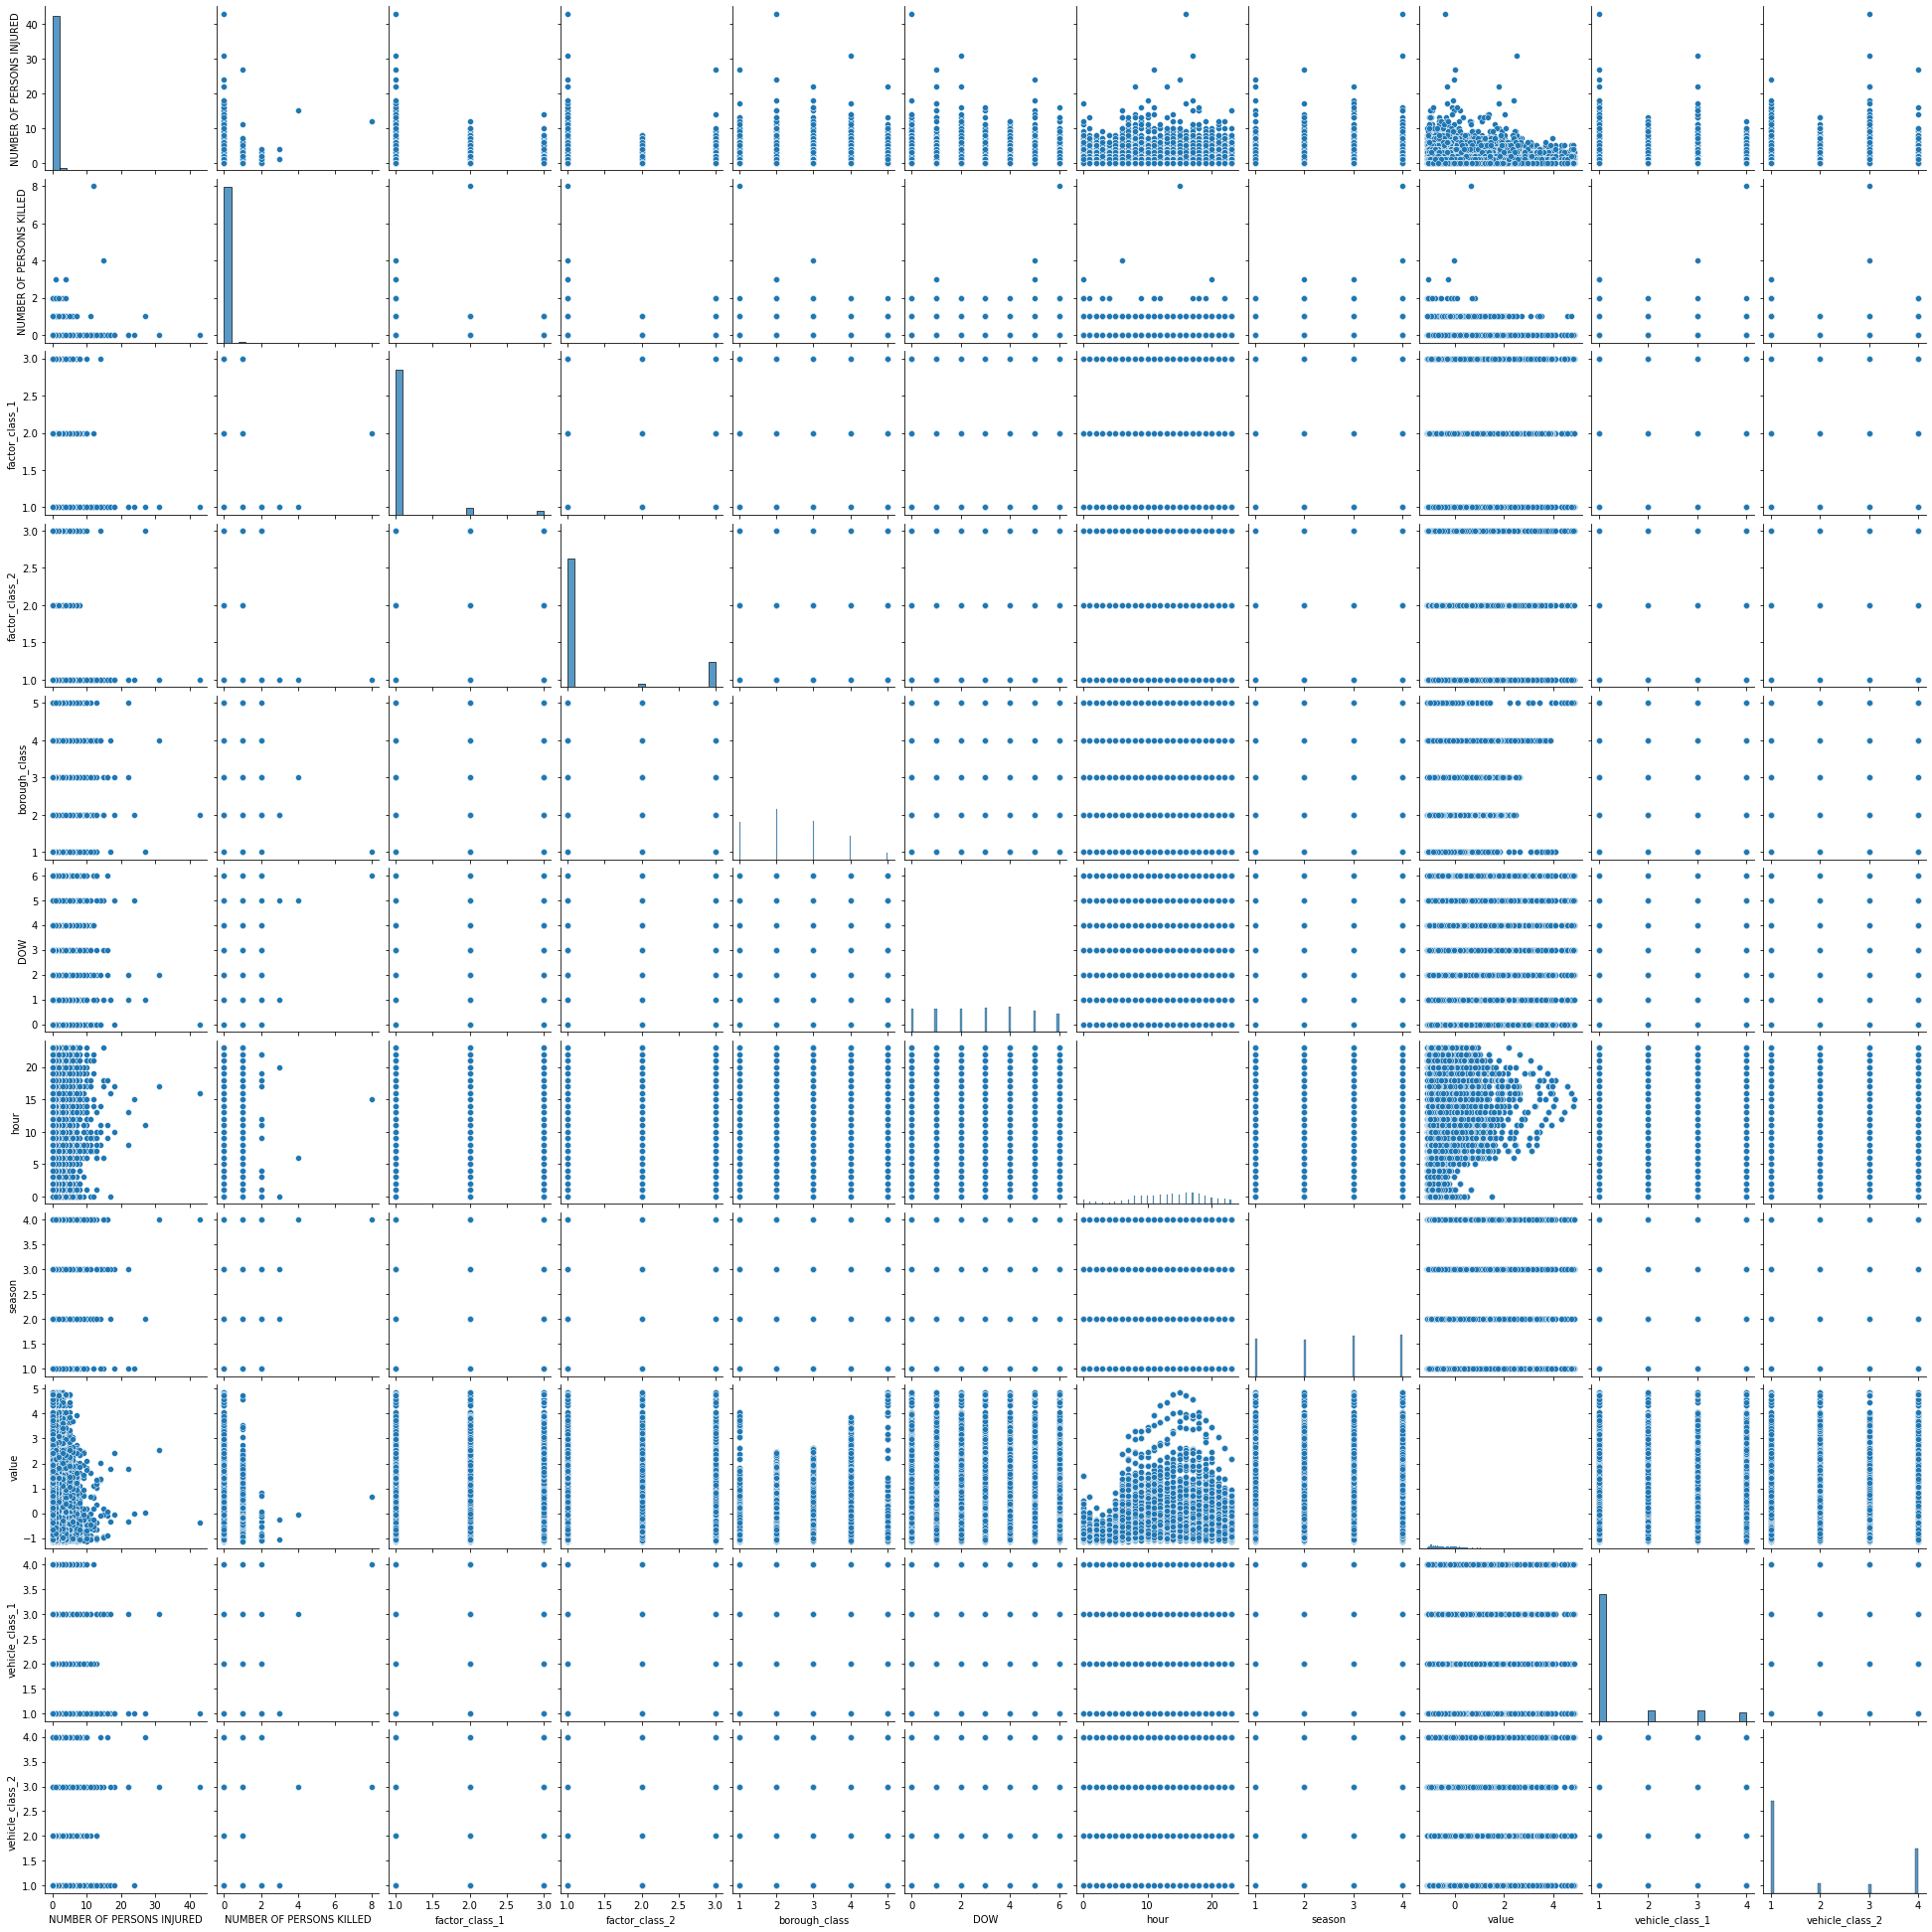

In [ ]:
sns.pairplot(final_df.iloc[:,:]);

In [ ]:
# import pymc3 as pm
# with pm.Model() as linear_model:
#     x = final_df['value']
#     y = final_df['factor_class']

#     # Intercept prior
#     intercept = pm.Normal('Intercept', mu = 15, sd = 5)
    
#     # Slope prior
#     slope = pm.Normal('slope', mu = 7.5, sd = 5)
    
#     # Standard deviation prior
#     sigma = pm.HalfNormal('sigma', sd = 10)
    
#     # y_est is the specification of the Bayesian model (here linear regression) to be estimated.
#     y_est = intercept + slope * x
    
#     # define likelihood
#     likelihood = pm.Normal('Y_obs', mu = y_est, sd = sigma, observed = y)
    
#     # MCMC sampling
#     # We use the Maximum a Posteriori (MAP) values as starting values for the MCMC sampling.
#     start = pm.find_MAP()
#     trace1 = pm.sample(1000, start=start, progressbar=True)

In [ ]:
# with linear_model:
#     az.plot_trace(trace1[199:10A00], compact=True, combined=False, legend=True)
#     plt.figure(figsize = (10, 10))
#     display(az.summary(trace1, round_to=2));